In [4]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd 
import numpy as np

In [5]:
df_awal = pd.read_csv("review_modle_awal.csv", sep=',', encoding='latin1')
df_awal.head(15)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,2b0ce3b5-4894-4f4d-ba7c-7a799da99d56,hasanss 244,https://play-lh.googleusercontent.com/a-/ALV-U...,Cukup membantu dalam belajar namun kekurangann...,4,0,4.3.0,2023-11-15 12:36:35,NaN,NaN,4.3.0
1,49f0b098-e21f-4d46-87d7-073f9f5d5dea,Diya Salsabila,https://play-lh.googleusercontent.com/a/ACg8oc...,Sejauh ini bagus si cm kekuranganya pas upload...,3,0,4.2.0,2023-11-14 03:31:09,NaN,NaN,4.2.0
2,2420f8ea-42c5-4ce3-8e56-b7a759caf72c,Widi Saputra,https://play-lh.googleusercontent.com/a-/ALV-U...,"Gatau ni aplikasi gajelas gini, udah kirim sat...",1,2,4.2.0,2023-10-23 08:09:18,NaN,NaN,4.2.0
3,bc740079-4ba9-44fa-a895-567c922ba9c9,Kunthi,https://play-lh.googleusercontent.com/a/ACg8oc...,"Tadinya bagus sih pas awal2. Simpel, cepet, mu...",2,112,3.9.5,2021-10-03 17:30:00,NaN,NaN,3.9.5
4,6cb6ab81-fd31-4988-9d82-a265931d5ace,Franciskus Damianus,https://play-lh.googleusercontent.com/a-/ALV-U...,"Awalnya aplikasi ini sangat bagus, tapi setela...",1,11,3.9.5,2022-04-18 11:55:03,NaN,NaN,3.9.5
5,64a1e82f-36ec-4210-b28d-f24248fa4ec0,Fitrie Hasibuan,https://play-lh.googleusercontent.com/a-/ALV-U...,Entahlah kenapa aplikasi ini tidak sebagus dul...,2,10,4.2.0,2023-06-13 01:17:40,NaN,NaN,4.2.0
6,5a48d8d3-c6a8-453e-93a9-4069f2731997,Jamiro Noor Z.,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi jelek kurang cepet bahkan loading gan...,1,3,NaN,2020-06-08 01:43:23,NaN,NaN,NaN
7,51278440-9e5b-4eb1-904e-874a7bbcdb36,Hannamutiara Putri,https://play-lh.googleusercontent.com/a-/ALV-U...,Dulu perasaan ga gini:( ini ngirim tugas udh k...,2,0,4.2.0,2023-10-22 09:13:26,NaN,NaN,4.2.0
8,38ce532a-169d-4411-a125-c3204adb1820,duo F furqanfathir,https://play-lh.googleusercontent.com/a-/ALV-U...,Membantu pembelajaran menjadi lebih kreatif da...,5,0,4.2.0,2023-10-26 13:30:40,NaN,NaN,4.2.0
9,466c072d-2251-4e42-9500-3f6a1de8e7ff,Siti_ Anum,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplikasi apaan ini, tidak membantu sama sekali...",1,89,3.8.2,2020-04-28 14:20:03,NaN,NaN,3.8.2


In [6]:
pd.set_option('display.max_colwidth', None)

In [7]:
#membuang kolom / fitur yang akan di gunakan nantinya dan merename kolom
df = df_awal[["content", "score"]].rename(columns={'score': 'rating', 'content': 'komen'})
df.head()

,komen,rating
0,Cukup membantu dalam belajar namun kekurangannya agak lemot,4
1,"Sejauh ini bagus si cm kekuranganya pas upload foto jdi ngeblur dan jelek, jdnya pas saya ngirim tugas pas ke upload tulisan jdi burem dan jelek bgt bnrn tolong dong perbaiki kualitas foto yg di upload",3
2,"Gatau ni aplikasi gajelas gini, udah kirim satu file tauÂ² jadi 6 file kan bingung tu, udah gitu jadi nilainya kurang gara2 ngeleg2 gitu, sumpah ga rekomend banget",1
3,"Tadinya bagus sih pas awal2. Simpel, cepet, mudah dipahami juga dashboardnya. Tadinya mau ku kasih bintang 5, tapi udah hampir 3 Minggu ini malah bermasalah. Dipakek kirim tugas lemooottt bgt, pakai WiFi aja bisa sampe 10 menit. Padahal cuma 2 file tugasn dan jumlahnya cuma 3MB. Ga bisa dipakek absen juga, kayak ada pilihan absensinya tapi ga bisa dipilih dan disubmit. Mohon diperbaiki, kalau membaik saya tambah bintangnya ððð",2
4,"Awalnya aplikasi ini sangat bagus, tapi setelah update jadi sagat jelek, pertama karena aplikasinya lemot kalau scroll (sering ada tulisan ""aplikasi tidak menanggapi"") atau download file, kedua tampilannya jadi tidak enak dilihat karena berantakan",1


In [44]:
# Case folding
import re

def casefolding(komen):
    # Konversi ke lowercase
    komen = komen.lower()

    # Hapus angka
    komen = re.sub(r'\d+', '', komen)

    # Hapus emoji
    komen = re.sub(r'[\U00010000-\U0010ffff]', '', komen)

    # Hapus karakter-karakter tertentu
    komen = komen.strip(" ")
    komen = re.sub(r'[?|$|.|!²_:")(-+,]', '', komen)
    komen = re.sub(r'[^\w\s]','',komen) # menghapus karakter tanda baca

    return komen

# Terapkan fungsi pada kolom 'komen'
df['case_folding'] = df['komen'].apply(casefolding)
df.head()

,komen,rating,case_folding
0,Cukup membantu dalam belajar namun kekurangannya agak lemot,4,cukup membantu dalam belajar namun kekurangannya agak lemot
1,"Sejauh ini bagus si cm kekuranganya pas upload foto jdi ngeblur dan jelek, jdnya pas saya ngirim tugas pas ke upload tulisan jdi burem dan jelek bgt bnrn tolong dong perbaiki kualitas foto yg di upload",3,sejauh ini bagus si cm kekuranganya pas upload foto jdi ngeblur dan jelek jdnya pas saya ngirim tugas pas ke upload tulisan jdi burem dan jelek bgt bnrn tolong dong perbaiki kualitas foto yg di upload
2,"Gatau ni aplikasi gajelas gini, udah kirim satu file tauÂ² jadi 6 file kan bingung tu, udah gitu jadi nilainya kurang gara2 ngeleg2 gitu, sumpah ga rekomend banget",1,gatau ni aplikasi gajelas gini udah kirim satu file tauâ jadi file kan bingung tu udah gitu jadi nilainya kurang gara ngeleg gitu sumpah ga rekomend banget
3,"Tadinya bagus sih pas awal2. Simpel, cepet, mudah dipahami juga dashboardnya. Tadinya mau ku kasih bintang 5, tapi udah hampir 3 Minggu ini malah bermasalah. Dipakek kirim tugas lemooottt bgt, pakai WiFi aja bisa sampe 10 menit. Padahal cuma 2 file tugasn dan jumlahnya cuma 3MB. Ga bisa dipakek absen juga, kayak ada pilihan absensinya tapi ga bisa dipilih dan disubmit. Mohon diperbaiki, kalau membaik saya tambah bintangnya ððð",2,tadinya bagus sih pas awal simpel cepet mudah dipahami juga dashboardnya tadinya mau ku kasih bintang tapi udah hampir minggu ini malah bermasalah dipakek kirim tugas lemooottt bgt pakai wifi aja bisa sampe menit padahal cuma file tugasn dan jumlahnya cuma mb ga bisa dipakek absen juga kayak ada pilihan absensinya tapi ga bisa dipilih dan disubmit mohon diperbaiki kalau membaik saya tambah bintangnya ððð
4,"Awalnya aplikasi ini sangat bagus, tapi setelah update jadi sagat jelek, pertama karena aplikasinya lemot kalau scroll (sering ada tulisan ""aplikasi tidak menanggapi"") atau download file, kedua tampilannya jadi tidak enak dilihat karena berantakan",1,awalnya aplikasi ini sangat bagus tapi setelah update jadi sagat jelek pertama karena aplikasinya lemot kalau scroll sering ada tulisan aplikasi tidak menanggapi atau download file kedua tampilannya jadi tidak enak dilihat karena berantakan


In [45]:
print('Kata awal\t\t:',df['komen'].iloc[13])
print('Casefolding\t\t:',df['case_folding'].iloc[13])

Kata awal		: Sangat membantu dalam belajar jarak jauh, bisa diakses dimana saja.
Casefolding		: sangat membantu dalam belajar jarak jauh bisa diakses dimana saja


In [46]:
#word normalization
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(komen):
    words = komen.split()
    normalized_text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in words])
    normalized_text = str.lower(normalized_text)
    return normalized_text

df['word_normal'] = df['case_folding'].apply(text_normalize)
df.head()


,komen,rating,case_folding,word_normal
0,Cukup membantu dalam belajar namun kekurangannya agak lemot,4,cukup membantu dalam belajar namun kekurangannya agak lemot,cukup membantu dalam belajar namun kekurangannya agak lemot
1,"Sejauh ini bagus si cm kekuranganya pas upload foto jdi ngeblur dan jelek, jdnya pas saya ngirim tugas pas ke upload tulisan jdi burem dan jelek bgt bnrn tolong dong perbaiki kualitas foto yg di upload",3,sejauh ini bagus si cm kekuranganya pas upload foto jdi ngeblur dan jelek jdnya pas saya ngirim tugas pas ke upload tulisan jdi burem dan jelek bgt bnrn tolong dong perbaiki kualitas foto yg di upload,sejauh ini bagus si cuma kekuranganya pas upload foto jdi ngeblur dan jelek jadinya pas saya mengirim tugas pas ke upload tulisan jdi burem dan jelek banget beneran tolong dong perbaiki kualitas foto yang di upload
2,"Gatau ni aplikasi gajelas gini, udah kirim satu file tauÂ² jadi 6 file kan bingung tu, udah gitu jadi nilainya kurang gara2 ngeleg2 gitu, sumpah ga rekomend banget",1,gatau ni aplikasi gajelas gini udah kirim satu file tauâ jadi file kan bingung tu udah gitu jadi nilainya kurang gara ngeleg gitu sumpah ga rekomend banget,gatau ini aplikasi gajelas gini sudah kirim satu file tauâ jadi file kan bingung itu sudah gitu jadi nilainya kurang gara ngeleg gitu sumpah ga rekomend banget
3,"Tadinya bagus sih pas awal2. Simpel, cepet, mudah dipahami juga dashboardnya. Tadinya mau ku kasih bintang 5, tapi udah hampir 3 Minggu ini malah bermasalah. Dipakek kirim tugas lemooottt bgt, pakai WiFi aja bisa sampe 10 menit. Padahal cuma 2 file tugasn dan jumlahnya cuma 3MB. Ga bisa dipakek absen juga, kayak ada pilihan absensinya tapi ga bisa dipilih dan disubmit. Mohon diperbaiki, kalau membaik saya tambah bintangnya ððð",2,tadinya bagus sih pas awal simpel cepet mudah dipahami juga dashboardnya tadinya mau ku kasih bintang tapi udah hampir minggu ini malah bermasalah dipakek kirim tugas lemooottt bgt pakai wifi aja bisa sampe menit padahal cuma file tugasn dan jumlahnya cuma mb ga bisa dipakek absen juga kayak ada pilihan absensinya tapi ga bisa dipilih dan disubmit mohon diperbaiki kalau membaik saya tambah bintangnya ððð,tadinya bagus sih pas awal simpel cepet mudah dipahami juga dashboardnya tadinya mau ku kasih bintang tapi sudah hampir minggu ini malah bermasalah dipakek kirim tugas lemooottt banget pakai wifi saja bisa sampai menit padahal cuma file tugasn dan jumlahnya cuma mbak ga bisa dipakek absen juga kayak ada pilihan absensinya tapi ga bisa dipilih dan disubmit mohon diperbaiki kalau membaik saya tambah bintangnya ððð
4,"Awalnya aplikasi ini sangat bagus, tapi setelah update jadi sagat jelek, pertama karena aplikasinya lemot kalau scroll (sering ada tulisan ""aplikasi tidak menanggapi"") atau download file, kedua tampilannya jadi tidak enak dilihat karena berantakan",1,awalnya aplikasi ini sangat bagus tapi setelah update jadi sagat jelek pertama karena aplikasinya lemot kalau scroll sering ada tulisan aplikasi tidak menanggapi atau download file kedua tampilannya jadi tidak enak dilihat karena berantakan,awalnya aplikasi ini sangat bagus tapi setelah update jadi sagat jelek pertama karena aplikasinya lemot kalau scroll sering ada tulisan aplikasi tidak menanggapi atau download file kedua tampilannya jadi tidak enak dilihat karena berantakan


In [47]:
print('Kata awal\t\t:',df['komen'].iloc[23])
print('word normalize\t\t:',df['word_normal'].iloc[23])

Kata awal		: Bisa dengan mudah dan cepat serta tidak sering gangguan siknal alias krowdit or Lowbet
word normalize		: bisa dengan mudah dan cepat serta tidak sering gangguan sinyal atau ramai atau boros


In [48]:
# Tokenization
def token(komen):
    nstr = komen.split(' ')
    dat = []
    a = -1
    for hu in nstr:
        a = a + 1
        if hu =='':
            dat.append(a) 
    p = 0
    b = 0
    for q in dat:
        b = q - p
        del nstr[b]
        p = p + 1
    return nstr
df['tokenize'] = df['word_normal'].apply(token)
df.head()

,komen,rating,case_folding,word_normal,tokenize
0,Cukup membantu dalam belajar namun kekurangannya agak lemot,4,cukup membantu dalam belajar namun kekurangannya agak lemot,cukup membantu dalam belajar namun kekurangannya agak lemot,"[cukup, membantu, dalam, belajar, namun, kekurangannya, agak, lemot]"
1,"Sejauh ini bagus si cm kekuranganya pas upload foto jdi ngeblur dan jelek, jdnya pas saya ngirim tugas pas ke upload tulisan jdi burem dan jelek bgt bnrn tolong dong perbaiki kualitas foto yg di upload",3,sejauh ini bagus si cm kekuranganya pas upload foto jdi ngeblur dan jelek jdnya pas saya ngirim tugas pas ke upload tulisan jdi burem dan jelek bgt bnrn tolong dong perbaiki kualitas foto yg di upload,sejauh ini bagus si cuma kekuranganya pas upload foto jdi ngeblur dan jelek jadinya pas saya mengirim tugas pas ke upload tulisan jdi burem dan jelek banget beneran tolong dong perbaiki kualitas foto yang di upload,"[sejauh, ini, bagus, si, cuma, kekuranganya, pas, upload, foto, jdi, ngeblur, dan, jelek, jadinya, pas, saya, mengirim, tugas, pas, ke, upload, tulisan, jdi, burem, dan, jelek, banget, beneran, tolong, dong, perbaiki, kualitas, foto, yang, di, upload]"
2,"Gatau ni aplikasi gajelas gini, udah kirim satu file tauÂ² jadi 6 file kan bingung tu, udah gitu jadi nilainya kurang gara2 ngeleg2 gitu, sumpah ga rekomend banget",1,gatau ni aplikasi gajelas gini udah kirim satu file tauâ jadi file kan bingung tu udah gitu jadi nilainya kurang gara ngeleg gitu sumpah ga rekomend banget,gatau ini aplikasi gajelas gini sudah kirim satu file tauâ jadi file kan bingung itu sudah gitu jadi nilainya kurang gara ngeleg gitu sumpah ga rekomend banget,"[gatau, ini, aplikasi, gajelas, gini, sudah, kirim, satu, file, tauâ, jadi, file, kan, bingung, itu, sudah, gitu, jadi, nilainya, kurang, gara, ngeleg, gitu, sumpah, ga, rekomend, banget]"
3,"Tadinya bagus sih pas awal2. Simpel, cepet, mudah dipahami juga dashboardnya. Tadinya mau ku kasih bintang 5, tapi udah hampir 3 Minggu ini malah bermasalah. Dipakek kirim tugas lemooottt bgt, pakai WiFi aja bisa sampe 10 menit. Padahal cuma 2 file tugasn dan jumlahnya cuma 3MB. Ga bisa dipakek absen juga, kayak ada pilihan absensinya tapi ga bisa dipilih dan disubmit. Mohon diperbaiki, kalau membaik saya tambah bintangnya ððð",2,tadinya bagus sih pas awal simpel cepet mudah dipahami juga dashboardnya tadinya mau ku kasih bintang tapi udah hampir minggu ini malah bermasalah dipakek kirim tugas lemooottt bgt pakai wifi aja bisa sampe menit padahal cuma file tugasn dan jumlahnya cuma mb ga bisa dipakek absen juga kayak ada pilihan absensinya tapi ga bisa dipilih dan disubmit mohon diperbaiki kalau membaik saya tambah bintangnya ððð,tadinya bagus sih pas awal simpel cepet mudah dipahami juga dashboardnya tadinya mau ku kasih bintang tapi sudah hampir minggu ini malah bermasalah dipakek kirim tugas lemooottt banget pakai wifi saja bisa sampai menit padahal cuma file tugasn dan jumlahnya cuma mbak ga bisa dipakek absen juga kayak ada pilihan absensinya tapi ga bisa dipilih dan disubmit mohon diperbaiki kalau membaik saya tambah bintangnya ððð,"[tadinya, bagus, sih, pas, awal, simpel, cepet, mudah, dipahami, juga, dashboardnya, tadinya, mau, ku, kasih, bintang, tapi, sudah, hampir, minggu, ini, malah, bermasalah, dipakek, kirim, tugas, lemooottt, banget, pakai, wifi, saja, bisa, sampai, menit, padahal, cuma, file, tugasn, dan, jumlahnya, cuma, mbak, ga, bisa, dipakek, absen, juga, kayak, ada, pilihan, absensinya, tapi, ga, bisa, dipilih, dan, disubmit, mohon, diperbaiki, kalau, membaik, saya, tambah, bintangnya, ððð]"
4,"Awalnya aplikasi ini sangat bagus, tapi setelah update jadi sagat jelek, pertama karena aplikasinya lemot kalau scroll (sering ada tulisan ""aplikasi tidak menanggapi"") atau download file, kedua tampilannya jadi tidak enak dilihat karena berantakan",1,awalnya aplikasi ini sangat bagus tapi setelah update jadi sagat jelek pertama karena aplikasinya lemot kalau scroll sering ada tulis

In [49]:
print('Kata awal\t\t:',df['komen'].iloc[13])
print('Casefolding\t\t:',df['case_folding'].iloc[13])
print('Tokenize\t\t:',df['tokenize'].iloc[13])


Kata awal		: Sangat membantu dalam belajar jarak jauh, bisa diakses dimana saja.
Casefolding		: sangat membantu dalam belajar jarak jauh bisa diakses dimana saja
Tokenize		: ['sangat', 'membantu', 'dalam', 'belajar', 'jarak', 'jauh', 'bisa', 'diakses', 'dimana', 'saja']


In [50]:
from nltk.corpus import stopwords

more_stopwords = ['aaaaaahhhhh', 'aah', 'aakkkk', 'woiii', 'abt', 'acong', 'ah','ahh','ahhh','ahhhh','aiti',
                  'aj','ajaaaa','acess','activationaktivasi','afk','akskbxjsnd','am','ampass','ampe','ampee','anjeeeengg',
                 'gg','aplikadi','jdi','appcmn','aplilasi','aplilasi','apayg','anjghapus','jd','yg','bamgettttt','bagustpi',
                  'bagusspngej','bagis','bagaimanana','aupport','appcmn','aplikasj','bangbang','bangkrruut','bamgettttt',
                  'centangnyaaintinnya','byzulpahri','bwangat','bngttttttttolong','bngetkalo','ckuakz','deddytolloll','danbagak',
                 'cuuuuuuttttitu','cuihh','cokkk','cok','coeg','ckuakz','dhlh','dg','deddytolloll','dijalankanjika','digerakkanmaaf',
                 'dhlh']

def stopword_removal(komen):
    filtering = set(stopwords.words('indonesian', 'english') + more_stopwords)
    df = [x for x in komen if x not in filtering]
    return df

df['stop_word'] = df['tokenize'].apply(stopword_removal)
df.head()

,komen,rating,case_folding,word_normal,tokenize,stop_word
0,Cukup membantu dalam belajar namun kekurangannya agak lemot,4,cukup membantu dalam belajar namun kekurangannya agak lemot,cukup membantu dalam belajar namun kekurangannya agak lemot,"[cukup, membantu, dalam, belajar, namun, kekurangannya, agak, lemot]","[membantu, belajar, kekurangannya, lemot]"
1,"Sejauh ini bagus si cm kekuranganya pas upload foto jdi ngeblur dan jelek, jdnya pas saya ngirim tugas pas ke upload tulisan jdi burem dan jelek bgt bnrn tolong dong perbaiki kualitas foto yg di upload",3,sejauh ini bagus si cm kekuranganya pas upload foto jdi ngeblur dan jelek jdnya pas saya ngirim tugas pas ke upload tulisan jdi burem dan jelek bgt bnrn tolong dong perbaiki kualitas foto yg di upload,sejauh ini bagus si cuma kekuranganya pas upload foto jdi ngeblur dan jelek jadinya pas saya mengirim tugas pas ke upload tulisan jdi burem dan jelek banget beneran tolong dong perbaiki kualitas foto yang di upload,"[sejauh, ini, bagus, si, cuma, kekuranganya, pas, upload, foto, jdi, ngeblur, dan, jelek, jadinya, pas, saya, mengirim, tugas, pas, ke, upload, tulisan, jdi, burem, dan, jelek, banget, beneran, tolong, dong, perbaiki, kualitas, foto, yang, di, upload]","[bagus, si, kekuranganya, pas, upload, foto, ngeblur, jelek, pas, mengirim, tugas, pas, upload, tulisan, burem, jelek, banget, beneran, tolong, perbaiki, kualitas, foto, upload]"
2,"Gatau ni aplikasi gajelas gini, udah kirim satu file tauÂ² jadi 6 file kan bingung tu, udah gitu jadi nilainya kurang gara2 ngeleg2 gitu, sumpah ga rekomend banget",1,gatau ni aplikasi gajelas gini udah kirim satu file tauâ jadi file kan bingung tu udah gitu jadi nilainya kurang gara ngeleg gitu sumpah ga rekomend banget,gatau ini aplikasi gajelas gini sudah kirim satu file tauâ jadi file kan bingung itu sudah gitu jadi nilainya kurang gara ngeleg gitu sumpah ga rekomend banget,"[gatau, ini, aplikasi, gajelas, gini, sudah, kirim, satu, file, tauâ, jadi, file, kan, bingung, itu, sudah, gitu, jadi, nilainya, kurang, gara, ngeleg, gitu, sumpah, ga, rekomend, banget]","[gatau, aplikasi, gajelas, gini, kirim, file, tauâ, file, bingung, gitu, nilainya, gara, ngeleg, gitu, sumpah, ga, rekomend, banget]"
3,"Tadinya bagus sih pas awal2. Simpel, cepet, mudah dipahami juga dashboardnya. Tadinya mau ku kasih bintang 5, tapi udah hampir 3 Minggu ini malah bermasalah. Dipakek kirim tugas lemooottt bgt, pakai WiFi aja bisa sampe 10 menit. Padahal cuma 2 file tugasn dan jumlahnya cuma 3MB. Ga bisa dipakek absen juga, kayak ada pilihan absensinya tapi ga bisa dipilih dan disubmit. Mohon diperbaiki, kalau membaik saya tambah bintangnya ððð",2,tadinya bagus sih pas awal simpel cepet mudah dipahami juga dashboardnya tadinya mau ku kasih bintang tapi udah hampir minggu ini malah bermasalah dipakek kirim tugas lemooottt bgt pakai wifi aja bisa sampe menit padahal cuma file tugasn dan jumlahnya cuma mb ga bisa dipakek absen juga kayak ada pilihan absensinya tapi ga bisa dipilih dan disubmit mohon diperbaiki kalau membaik saya tambah bintangnya ððð,tadinya bagus sih pas awal simpel cepet mudah dipahami juga dashboardnya tadinya mau ku kasih bintang tapi sudah hampir minggu ini malah bermasalah dipakek kirim tugas lemooottt banget pakai wifi saja bisa sampai menit padahal cuma file tugasn dan jumlahnya cuma mbak ga bisa dipakek absen juga kayak ada pilihan absensinya tapi ga bisa dipilih dan disubmit mohon diperbaiki kalau membaik saya tambah bintangnya ððð,"[tadinya, bagus, sih, pas, awal, simpel, cepet, mudah, dipahami, juga, dashboardnya, tadinya, mau, ku, kasih, bintang, tapi, sudah, hampir, minggu, ini, malah, bermasalah, dipakek, kirim, tugas, lemooottt, banget, pakai, wifi, saja, bisa, sampai, menit, padahal, cuma, file, tugasn, dan, jumlahnya, cuma, mbak, ga, bisa, dipakek, absen, juga, kayak, ada, pilihan, absensinya, tapi, ga, bisa, dipilih, dan, disubmit, mohon, diperbaiki, kalau, membaik, saya, tambah, bintangnya, ððð]","[bagus, sih, pas, s

In [51]:
print('Kata awal\t\t:',df['komen'].iloc[13])
print('Casefolding\t\t:',df['case_folding'].iloc[13])
print('Tokenize\t\t:',df['tokenize'].iloc[13])
print('stopword\t\t:',df['stop_word'].iloc[13])


Kata awal		: Sangat membantu dalam belajar jarak jauh, bisa diakses dimana saja.
Casefolding		: sangat membantu dalam belajar jarak jauh bisa diakses dimana saja
Tokenize		: ['sangat', 'membantu', 'dalam', 'belajar', 'jarak', 'jauh', 'bisa', 'diakses', 'dimana', 'saja']
stopword		: ['membantu', 'belajar', 'jarak', 'diakses', 'dimana']


In [54]:
# Stemming
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(komen):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in komen:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean =" ".join(do)
    print(d_clean)
    return d_clean
df['stemming'] = df['stop_word'].apply(stemming)


bantu ajar kurang lot
bagus si kekuranganya pas upload foto ngeblur jelek pas kirim tugas pas upload tulis burem jelek banget beneran tolong baik kualitas foto upload
gatau aplikasi gajelas gin kirim file tau file bingung gitu nilai gara ngeleg gitu sumpah ga rekomend banget
bagus sih pas simpel cepet mudah paham dashboardnya ku kasih bintang minggu masalah dipakek kirim tugas lemooottt banget pakai wifi menit file tugasn mbak ga dipakek absen kayak pilih absensi ga pilih disubmit mohon baik baik bintang 
aplikasi bagus update sagat jelek aplikasi lot scroll tulis aplikasi tanggap download file tampil enak beranta
aplikasi bagus kuliah pas semester andal mudah semester
aplikasi jelek cepet loading ganti makan detik ngelag jaring wifi lancar rekomendasi aplikasi ulang murid sekolah sdsmpsmasmk buruk sistem didik paksa murid berfikir cepat buru buru butuh selesai
asa ga gin kirim tugas kirim status ga ubah gtu lot nya mainn
bantu ajar kreatif ter struktur 
aplikasi bantu sekaliuntuk kiri

mohon download apk pikir kali kendala terus ikut sistem sekolah pakai apk anak kendala terusmenerus maju budak apk mending pakai gform efisiensi mudah ngapain nyari susah
aplikasi nya gabisa buka ya jaring bagus pas buka apk tibatiba jelek coba buka apk lancar buka apk putar gmn ya min
hebat loadingnya nyuci sempak kelarr garena tolong baik cepat lelet telat absen loading cita cita telat absen loading alpha guru adik adik
bantu mudah erti latih prakerja lengkap moodle nya kuis  cocok banget latih ajar sistem daring 
gw ga ngerti ya knp dsuruh pakai moodle aplikasi mudah guna mahasiswa join g meet ga langsung connect gw install g meet nya aneh
aplikasi gk guna guru materi aku gk gara gara apk tugas nilai rapotku bawah kkm rajin tugas gara gara apk males rajin ajar
aplikasi lumayan pakai jaringa hitung lambat boros chatroom formnya tolong baru langsung cakap susah masuk chatroom riwayat
bug aju presensi aplikasi pilih menu presensi klik aplikasi harus buka browser
terkadang aplikasi suka

apk si kalo ketrampilan silah apk moodle sengsara loading banget efisien silah baik apk nya woii bangkrut
aplikasi baik bantu ajar terimakasih lancar sesuai situs ajar univ universitaspelitaharapan
aplikasi bagus banget nilai aplikasi moodle nilai terimakasih moodle berkat aplikasi malas berfikir berfikir aplikasi moodle salah thebest aplikasi moodle
terkadang lot jaring bagus buang buang error
takut diupdate takut jelek apk nya alam kaya apk update jelek balik apk moodle update bagus simpel terimakasih moodle 
moodle gimana sih download fine g semenjak update suka eror buka apk nya putih g loading  ajar g adagimana developer nya tolong baik sistem nya susah ajar apa online
kasih bintang apk jalan lancar minggu buka apk nyapass masuk lagieh kadaluarsa
oke makasih update ribet ya kelas nya mana gagal sambung tolong developer hormat baik ya kn aplikasi didik tolong sulit 
aplikasi nya jelek lemotmenghabiskan kuota gak pemberitahuan klo tugas nilai ku anjlok gak absen rajin absen
aplikasi

aplikasi alat hubung cepat lot gantung server masingmasing sekolah universitas aplikasi bagus
tolong benerin bug aplikasi scroll langsung hitem gitu aplikasi nya lemotlambat
aplikasi bugharus rekomendasi guru ber jam nunggu gak connect jaring bagus spec hp mumpuni sisa storage gbsim card pakai telkomsel lancar liat youtube buka loading mulu
komplain moodle nya tugas lambat banget ulang mandet mandet mohon baik server nya
aplikasi bantu latih sabar pribadi sabar menolongjadi terima kasih ya moodle latih sabar
gak akses ngelag banget gak absen tolong baik kasih bintang deh kalo jalan optimal
efektif ajar
submitnya langkah siswa lupa ga tugas ga kaya tinggal pencet submit langsung selesai
gak buka sihpadahal jaring bagus kalo buka aplikasi laintapi kalo coba buka moodle gak masuk
alam aplikasi lot hosting moodelnya bagus aplikasi nya aplikasi client
tibatiba suruh log in bolak log in ribet tolong admin moodle baik
bingung ajar bahagia apk cocok pandemi ajar online daring poko mantap
upgra

bagus sih apk nya banget bug bug nya bikin mumet pala buka isi tugas mulu baik bugnya dihilangin gitu
bagus kadang lot jg mon maap niat nya senyum tugas keburu badmood gegara moodle nya lot mohon baik trmksih
buruk kirim tugas lambat sinyal kuota
terimakasih unduh aplikasi moga aplikasi nilai semester banggaaaa hore makasih ibuu
apk gak enak kasi bintang buka eror lot banget maaf gak puas apk
saran butuh aplikasi mending download lawas version google versi lancar banget versi lawas
aplikasi bagus lot kirim tugas tunggu loading mohon baik terima kasih 
moodle error invalid user log in pakai akun
diupdate bug tolong baik ajar nya susah kalo gitu
kirim tugas susah banget klik file
moodle bagus dengar video guru kelas sd pas dewasa gampang ajar susah dikit hehe
aplikasi moodle bagus ganggu apa terimakasih apk moodle bantu
mohon baik aplikasi luncur play store kendala error 
update biar buka aplikasi gak lot buka aplikasi
tambahin fitur alarmpemberitahuan tugas biar lupa pr gitu kurang teri

gabisa login apl nya jelek cih padah username password nya bener gabisa login gimana kali
wow aplikasi bagus tugas jam makasih hp rusak
notifikasi tugas masuk ga lambat kumpul tugas google classroom informasi tugas masuk
didownload pakai pakai jg susah ribet tolong mudah
aplikasi ga efektif dipake ajar sistem lemooooot kecewa banget sih pakai aplikasi
apk russakapaan aplikasi gua login bisamalah gagal mulu loginnya
aplikasi nya si bagus sayang suka ngelek ngelek mohon update aplikasi nya ngelek ngelek
hadehudah error jaring lancar tolong diperbaikilagi
apk nya nge lag yaa suka buka nya google lancar
gak akses kemarin user sandi bikin darah banget aplikasi 
aplikasi kece makasih aplikasi aplikasi guna semangat juang ajar
absen gak versi tolong baik ya min
upload filenya gagal gagal teruss upgrade
aplikasi oleh materi login ulang malasss
berkat aplikasi ajar latih prakerja ikut ilmu latih
aplikasi nilai edan gilir selesai error terima kasih aplikasi bikin otak nakerr
pas refresh tanda re

moodle tolong update buka butuh anak tugas
aplikasi buruk error lot
bagus aplikasi nya suka ngeleg kadang koneksi nya koneksi bagus
kemarin lancar lot tes aplikasi 
mohon tingkat tugas tampil apk
pakai ribet moodlebelum habis gabisa pakai
kacauuuuuu pokoknyaa kuota banyak sinyal wadai toples akses apl lai lancar nomor recoil akses apl putar bangkek
good aplikasi baik absensi kadang gak disubmit
loading sampek kiamat sinyal stabiltai ajar ga lancareror eror lgikekmana makek bos
update gk bagus lot
aplikasi lambat wifi stabil
aplikasi mudah kuliah mantap
beda webnya langsung apk gk detek webnya
mudah cepat kirim tugas
ya arah situs gabisa masuk kelas 
moodle udel alah sia boy buffering server down mudah bikin stress sih aplikasi pen jotos pal 
aplikasi ngetik bener gak tolong baik
aplikasi bagus nilai kecil jawab disalahin
sistem loginnya mudah krn terkadang susah login
smester jalan moodle tani gak keluh tingkat
rang bug nya aplikasi
harap corona cepat reda repot instal nih aplkadi ga a

sial baharu gak buka ajar sekolah hambat baik
e learning tolol update tambah bagus tambah rusakhapus bikin emosi
manfaat mudah paham makasih
loading mulu wifi bagus
aplikasi lelet kirim tugas
bantu g buka situs akses lms
aplikasi tai jelek banget sumpah dah jwbn gw bener salahin aplikasi taiii
susah pakeknya ajar online ribet gajelas
stabil jaring servernya
mah dibenerin suka apk link
banget eror lot ribet bikin sakit panas
gara gara nih apk mtk gw gw dah itung kali kali gw pastiin kali kali ttp salah elah mending ulang buku tulis dah
bug baik
mantap kalo males ngetik tinggal pakai google voice wkwkwk
aplikasi nya susah megerti anjur kn kelas online
terima kasih aplikasi sangtat bantu urus
p banget dih jaring bagus loading teruss
bahasa indonesia nya baik donk orang indonesia
lamaaaaaaaaa loadingnyakl ga paksa kantor suruh pakai aplikasi jelek gin ga pakai
aplikasi lot gua ksi rating stu ya
mudah pakai banding situs kalo hp
lot lola loading loading mareni bebeh
dibaikin la apk nya ngeb

kirim file tugas batas mbak
aplikasi kualitas servernya juelek banget
rekomendasi sakit kepala
bagus si apknya klau bukak suka lma putar dlu
bagus aplikasi sma negeri bulu pakai aplikasi ajar terima kasih
tarik aplikasi nya guna
upload tugas internet bagus
aplikasi bagus studen dosen
aplikasi nya suka lot erormakanya kasih bintang nya
aplikasi bantu tingkat mampu
bingung guru suruh orang unduh aplikasi error ratingnya bawah
absensi aplikasi
apk eror yamohon baik
bantu ajar
ga males baperan dikit close kirim tugas close dah
tolong aplikasi bagusin lgi eror nya susah pakai
aplikasi nya bantu ajar
knpa buka moodle gak kirim tugas eror
apk jelek buanyak lag servernya jelek
nyesall donwload aplikasi lambatt bngattt paket bnyak ko loding lambatt sekali nii menit nii
mudah dipelajarin
baguss ajar mudah deb sekarang
jelek banget gila update eror gw ngumpulin tugas
baik absen tampil
aplikasi gajelas loading nyusahin najis
bagus banget deh apk musim terap sekolah rumah
apk gampang down gabisa bu

eror gaada apk kek gibi gw tidur pagi biar g ajar
sih moodle eror kasih jelas eror ulang mohon jasa
bagus ajar masa pandemi covid
aplikasinnya bagus bantu
ajar kasih guru makasih yaaaa
apk haram jelek najis semenjak update gabisa buka kelas
aplikasi ngrim tugas gk masuk msukpayah
aplikasi jancuk ga akses situs anjingg
guna mending hapus 
gk liat dasbor kasih bintang update
mudah fan manfaat
tolong gak kirim ngumpulin tugas
pakai
aplikasi ribet beta ja dipake jaman kah tolol banget make kntl kau develop kau download yatim
alhamdulillah aplikasi 
lampir file kuis
lot banget aplikasi
lodingnya bangetttttt masak indomie bikin es teh mandi ngankat jemur kas bintang
inimah apk latih sabar bngt sumpah lahh kalo make gak sabar uninstall untung ndptin nilai kwe sabarrin nih apk ky lutung
mudah buka
batuin masuk modle
mau kasi min gak pts gak haduh haduh pts via wa ya
tolong bantu aplikasi hp android
error android ios aman
ga bagus banget apk nya
terimakasih lelet gak absen matur suwun banget
or

bangsat ga lu bikin uji sengsara lot jaring telkomael bangsat
habis update ga absen tolol
janagan kasih apk taeek nilai gak hapus play store gak taeekkk gak logis
erti
atas lupa password gmn
modlle tai gk buka uts gk trrus mari hapus moodle taii dasar
server nya lot
pemberitahuan lambat dah susah absen
apkk silnyal bagus buka apk jelekkkkkkkkk
benerin tuh bug anying
bantu
mantap keren
aplikasi jelek guna
aplikasi dukung
terima kasih kerja guru guru
bantu dosen
aplikasi nya gk
bagustapi lambat
aplikasi guna
gara ulang online kena remed suruh ulang dpt nilai kkm gw gk marathon drakor
aplikasi anjeng gara lu gw ajar online
aplikasi nya bagus
aplikasi si vpn ya
kontol jembuudd renyaahhh jwbnnya bener disalahin goblog emng apps
login masukin
lumayan sih aplikasi ny
bantu
aplikasi kasih bintang 
mudah
kumpul tugas
tolong bantu belajr d rumh
mantap bantu
mantap ajar enak
aplikasi tolol bener salahin
apk bantu
kek freefire bikin sakit mata hati
memusahkan cari mata ajar
apk gagauna naya enak r

downloadnya lama
ramah bintang
jelek ga masuk
bantu banget
busuk gabisa dipakekk 
muas
aplikasi kie uweruwer bae koh jeleih pol
masuk ngeleg uras sabar
gak nyontek
makasih moodle karnamu keluarga siksa nilai ku boblok bener
mantap pokok
sampah banget loadingny
bantu
suka aplikasi
aplikasi goblok
butut banget heran gagal pts cuy
gara gara gw alpa semester anying banget
lambatt
bantu
lot gituuu baguss
bantu
sertifikat
anying
baik
moga maju 
orang hebat khayal
kasi dlu ya ragu
sia monyet nun baleg nyien aplikasi tehlier eror waebtw min gift alok
donload nya 
akses jaring apk nya ko jlk pdalhal pakai wifi data ko jelek klau tiktok wa lncar mohon baik
mantap tolong
loading mulu njer wipi g pakai kuota jg kgk depresi 
awas nilai ku e
pemaaiyannya gimana
knpa masok susah
moodle erorr bang mohon baik
gua download gegara libur corona v yha pasi
akun gak masuk
nilai
kontolll gegara lu gua daring dsni ngentdd nyusahin anjg
gakat mulu bodoh
aplikasi ga
resmi tamat moddle
karna kerja
senang
apk gd 

dsx fwszdssdcc f we have been much more fun and
did i cant log in even my user nama and my password is alredy true
sometimes this aplikasi error
lag teroooossss plz perbaikii plisss
ribett mending classroom sumpah simpel
alhamdulillah with this aplikasi my learning is be more easier i say thank all of the developer desainer and all people that help make this learning application thank 
aplikasi sundel godek ubek lot
difficult aplication
apll buriikkk login susah
mending google classroom
apk apansi error
bug bangsst
halo bangv
mudah  ya
jelek
nice app desain simpel
ngelag bangett
aplikasi sampah
lelet kak
lot parahhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh
apk bangsat
error
bagus classroom bos
google classroom is better
ngeleg bangetr gila
this aplikasi help me
far good
gabisa absen
n
ok
bantu
bagus
bagus
good
lumayan
suka error
gt deh
ok
oke
coba
oke
very good
mantap 
its good
lot buruq
gak
aplikasi bangsat
gak bener
bad aplikasi
rasah ajar
aplikasi sampah

bagus
apik
takedown yuk

In [55]:
df.head()

,komen,rating,case_folding,word_normal,tokenize,stop_word,stemming
0,Cukup membantu dalam belajar namun kekurangannya agak lemot,4,cukup membantu dalam belajar namun kekurangannya agak lemot,cukup membantu dalam belajar namun kekurangannya agak lemot,"[cukup, membantu, dalam, belajar, namun, kekurangannya, agak, lemot]","[membantu, belajar, kekurangannya, lemot]",bantu ajar kurang lot
1,"Sejauh ini bagus si cm kekuranganya pas upload foto jdi ngeblur dan jelek, jdnya pas saya ngirim tugas pas ke upload tulisan jdi burem dan jelek bgt bnrn tolong dong perbaiki kualitas foto yg di upload",3,sejauh ini bagus si cm kekuranganya pas upload foto jdi ngeblur dan jelek jdnya pas saya ngirim tugas pas ke upload tulisan jdi burem dan jelek bgt bnrn tolong dong perbaiki kualitas foto yg di upload,sejauh ini bagus si cuma kekuranganya pas upload foto jdi ngeblur dan jelek jadinya pas saya mengirim tugas pas ke upload tulisan jdi burem dan jelek banget beneran tolong dong perbaiki kualitas foto yang di upload,"[sejauh, ini, bagus, si, cuma, kekuranganya, pas, upload, foto, jdi, ngeblur, dan, jelek, jadinya, pas, saya, mengirim, tugas, pas, ke, upload, tulisan, jdi, burem, dan, jelek, banget, beneran, tolong, dong, perbaiki, kualitas, foto, yang, di, upload]","[bagus, si, kekuranganya, pas, upload, foto, ngeblur, jelek, pas, mengirim, tugas, pas, upload, tulisan, burem, jelek, banget, beneran, tolong, perbaiki, kualitas, foto, upload]",bagus si kekuranganya pas upload foto ngeblur jelek pas kirim tugas pas upload tulis burem jelek banget beneran tolong baik kualitas foto upload
2,"Gatau ni aplikasi gajelas gini, udah kirim satu file tauÂ² jadi 6 file kan bingung tu, udah gitu jadi nilainya kurang gara2 ngeleg2 gitu, sumpah ga rekomend banget",1,gatau ni aplikasi gajelas gini udah kirim satu file tauâ jadi file kan bingung tu udah gitu jadi nilainya kurang gara ngeleg gitu sumpah ga rekomend banget,gatau ini aplikasi gajelas gini sudah kirim satu file tauâ jadi file kan bingung itu sudah gitu jadi nilainya kurang gara ngeleg gitu sumpah ga rekomend banget,"[gatau, ini, aplikasi, gajelas, gini, sudah, kirim, satu, file, tauâ, jadi, file, kan, bingung, itu, sudah, gitu, jadi, nilainya, kurang, gara, ngeleg, gitu, sumpah, ga, rekomend, banget]","[gatau, aplikasi, gajelas, gini, kirim, file, tauâ, file, bingung, gitu, nilainya, gara, ngeleg, gitu, sumpah, ga, rekomend, banget]",gatau aplikasi gajelas gin kirim file tau file bingung gitu nilai gara ngeleg gitu sumpah ga rekomend banget
3,"Tadinya bagus sih pas awal2. Simpel, cepet, mudah dipahami juga dashboardnya. Tadinya mau ku kasih bintang 5, tapi udah hampir 3 Minggu ini malah bermasalah. Dipakek kirim tugas lemooottt bgt, pakai WiFi aja bisa sampe 10 menit. Padahal cuma 2 file tugasn dan jumlahnya cuma 3MB. Ga bisa dipakek absen juga, kayak ada pilihan absensinya tapi ga bisa dipilih dan disubmit. Mohon diperbaiki, kalau membaik saya tambah bintangnya ððð",2,tadinya bagus sih pas awal simpel cepet mudah dipahami juga dashboardnya tadinya mau ku kasih bintang tapi udah hampir minggu ini malah bermasalah dipakek kirim tugas lemooottt bgt pakai wifi aja bisa sampe menit padahal cuma file tugasn dan jumlahnya cuma mb ga bisa dipakek absen juga kayak ada pilihan absensinya tapi ga bisa dipilih dan disubmit mohon diperbaiki kalau membaik saya tambah bintangnya ððð,tadinya bagus sih pas awal simpel cepet mudah dipahami juga dashboardnya tadinya mau ku kasih bintang tapi sudah hampir minggu ini malah bermasalah dipakek kirim tugas lemooottt banget pakai wifi saja bisa sampai menit padahal cuma file tugasn dan jumlahnya cuma mbak ga bisa dipakek absen juga kayak ada pilihan absensinya tapi ga bisa dipilih dan disubmit mohon diperbaiki kalau membaik saya tambah bintangnya ððð,"[tadinya, bagus, sih, pas, awal, simpel, cepet, mudah, dipahami, juga, dashboardnya, tadinya, mau, ku, kasih, bintang, tapi, sudah, hampir, minggu, ini, malah, bermasalah, dipakek, kirim, tugas, lemooottt, banget, paka

In [56]:
print('Kata awal\t\t:',df['komen'].iloc[13])
print('Casefolding\t\t:',df['case_folding'].iloc[13])
print('Tokenize\t\t:',df['tokenize'].iloc[13])
print('stopword\t\t:',df['stop_word'].iloc[13])
print('Stemming\t\t:',df['stemming'].iloc[13])

Kata awal		: Sangat membantu dalam belajar jarak jauh, bisa diakses dimana saja.
Casefolding		: sangat membantu dalam belajar jarak jauh bisa diakses dimana saja
Tokenize		: ['sangat', 'membantu', 'dalam', 'belajar', 'jarak', 'jauh', 'bisa', 'diakses', 'dimana', 'saja']
stopword		: ['membantu', 'belajar', 'jarak', 'diakses', 'dimana']
Stemming		: bantu ajar jarak akses mana


In [57]:
df_clear = df[['stemming', 'rating']].rename(columns={'stemming': 'komen'})
df_clear.to_csv('komen_moodle_presentasi.csv', index = False)

In [8]:
df_clear = pd.read_csv('komen_moodle_presentasi.csv')

In [9]:
df_clear

,komen,rating
0,bantu ajar kurang lot,4
1,bagus si kekuranganya pas upload foto ngeblur jelek pas kirim tugas pas upload tulis burem jelek banget beneran tolong baik kualitas foto upload,3
2,gatau aplikasi gajelas gin kirim file tau file bingung gitu nilai gara ngeleg gitu sumpah ga rekomend banget,1
3,bagus sih pas simpel cepet mudah paham dashboardnya ku kasih bintang minggu masalah dipakek kirim tugas lemooottt banget pakai wifi menit file tugasn mbak ga dipakek absen kayak pilih absensi ga pilih disubmit mohon baik baik bintang,2
4,aplikasi bagus update sagat jelek aplikasi lot scroll tulis aplikasi tanggap download file tampil enak beranta,1
...,...,...
2495,mantull,5
2496,useful,5
2497,bagus,5
2498,mantap,5


In [10]:
# Memberikan pelabelan pada rating(1-3 = Negatif, 4-5 = Positif) 
df_clear['label'] = df['rating'].map({1:'NEGATIF', 2:'NEGATIF', 3:'NEGATIF', 4:'POSITIF',5:'POSITIF'})
df_clear = df_clear.astype({'label' : 'category'})
df_clear = df_clear.astype({'komen' : 'string'})
df_clear.head()

,komen,rating,label
0,bantu ajar kurang lot,4,POSITIF
1,bagus si kekuranganya pas upload foto ngeblur jelek pas kirim tugas pas upload tulis burem jelek banget beneran tolong baik kualitas foto upload,3,NEGATIF
2,gatau aplikasi gajelas gin kirim file tau file bingung gitu nilai gara ngeleg gitu sumpah ga rekomend banget,1,NEGATIF
3,bagus sih pas simpel cepet mudah paham dashboardnya ku kasih bintang minggu masalah dipakek kirim tugas lemooottt banget pakai wifi menit file tugasn mbak ga dipakek absen kayak pilih absensi ga pilih disubmit mohon baik baik bintang,2,NEGATIF
4,aplikasi bagus update sagat jelek aplikasi lot scroll tulis aplikasi tanggap download file tampil enak beranta,1,NEGATIF


In [11]:
#Proses TF - IDF 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(df_clear['komen'].astype('U'))
text_tf

<2500x3187 sparse matrix of type '<class 'numpy.float64'>'
	with 14795 stored elements in Compressed Sparse Row format>

In [70]:
sub_tf = text_tf.toarray()
df_result = pd.DataFrame(sub_tf, columns=tf.get_feature_names_out())

# Menyimpan DataFrame ke dalam file Excel
df_result.to_excel('tfidf_presentasi.xlsx', index=False)

In [72]:
df_tfidf = pd.read_excel('tfidf_presentasi.xlsx')
# Menghitung total nilai TF-IDF untuk setiap kata
total_tfidf_per_kata = df_tfidf.sum(axis=0)

# Membuat DataFrame baru dengan kolom "nilai" dan "kata"
df_total_tfidf = pd.DataFrame({'nilai': total_tfidf_per_kata.values, 'kata': total_tfidf_per_kata.index})

# Menyortir DataFrame berdasarkan nilai tertinggi pada kolom "nilai"
df_sorted_tfidf = df_total_tfidf.sort_values(by='nilai', ascending=False)

# Menampilkan DataFrame yang sudah disortir
df_sorted_tfidf.head(10)

,nilai,kata
160,142.541242,aplikasi
235,119.201993,bagus
309,100.486408,bantu
2121,72.890950,nya
150,70.074290,apk
31,56.620970,ajar
2960,51.572843,tugas
283,50.884747,banget
948,50.824701,gak
259,50.006443,baik


<Axes: xlabel='rating', ylabel='count'>

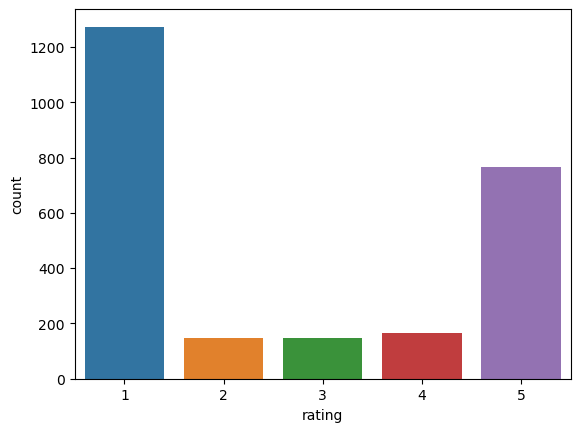

In [73]:
# EDA (Expolatory Data Analysis)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='rating', data=df_clear)

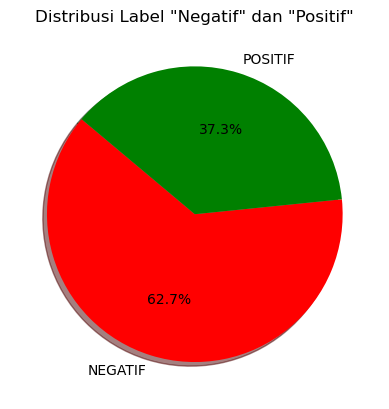

In [74]:
labels = df_clear['label'].value_counts().index
sizes = df_clear['label'].value_counts().values

# Membuat pie chart
plt.pie(sizes, labels=labels, colors=['red','green'], autopct='%1.1f%%', startangle=140, shadow= True)

# Menambahkan judul
plt.title('Distribusi Label "Negatif" dan "Positif"')

# Menampilkan pie chart
plt.show()

In [12]:
#Split data 80:20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_tf, df_clear['label'], test_size=0.2, random_state=40)

In [76]:
#variabel pengawas dari model kalsifikasi
y_test

2383    POSITIF
1297    POSITIF
2       NEGATIF
1647    NEGATIF
1356    NEGATIF
         ...   
51      POSITIF
252     NEGATIF
1352    NEGATIF
923     NEGATIF
1939    POSITIF
Name: label, Length: 500, dtype: category
Categories (2, object): ['NEGATIF', 'POSITIF']

In [13]:
# Model klasifikasi dan evaluasi model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


clf = MultinomialNB().fit(X_train, y_train)
predic = clf.predict(X_test)
predic

array(['POSITIF', 'NEGATIF', 'NEGATIF', 'NEGATIF', 'NEGATIF', 'NEGATIF',
       'NEGATIF', 'POSITIF', 'NEGATIF', 'NEGATIF', 'NEGATIF', 'NEGATIF',
       'NEGATIF', 'NEGATIF', 'NEGATIF', 'NEGATIF', 'NEGATIF', 'NEGATIF',
       'NEGATIF', 'POSITIF', 'NEGATIF', 'NEGATIF', 'NEGATIF', 'POSITIF',
       'POSITIF', 'POSITIF', 'NEGATIF', 'NEGATIF', 'NEGATIF', 'POSITIF',
       'POSITIF', 'POSITIF', 'NEGATIF', 'NEGATIF', 'NEGATIF', 'POSITIF',
       'POSITIF', 'NEGATIF', 'POSITIF', 'NEGATIF', 'POSITIF', 'NEGATIF',
       'POSITIF', 'POSITIF', 'NEGATIF', 'NEGATIF', 'NEGATIF', 'NEGATIF',
       'NEGATIF', 'NEGATIF', 'NEGATIF', 'NEGATIF', 'POSITIF', 'NEGATIF',
       'NEGATIF', 'NEGATIF', 'NEGATIF', 'NEGATIF', 'POSITIF', 'NEGATIF',
       'NEGATIF', 'NEGATIF', 'POSITIF', 'NEGATIF', 'NEGATIF', 'NEGATIF',
       'NEGATIF', 'NEGATIF', 'POSITIF', 'NEGATIF', 'NEGATIF', 'NEGATIF',
       'POSITIF', 'NEGATIF', 'POSITIF', 'NEGATIF', 'POSITIF', 'NEGATIF',
       'NEGATIF', 'NEGATIF', 'NEGATIF', 'NEGATIF', 

In [14]:
predik_benar = (predic == y_test).sum()
predik_salah = (predic != y_test).sum()

print('jumlah benar : ', predik_benar)
print('jumlah salah : ', predik_salah)

jumlah benar :  406
jumlah salah :  94


In [15]:
print("MultinomialNB akurasi score : ", accuracy_score(y_test,predic))

print(f'confusion_matrix : \n {confusion_matrix(y_test, predic)}')
print("=============================== \n")
print(classification_report(y_test,predic, zero_division=0))

MultinomialNB akurasi score :  0.812
confusion_matrix : 
 [[294  20]
 [ 74 112]]

              precision    recall  f1-score   support

     NEGATIF       0.80      0.94      0.86       314
     POSITIF       0.85      0.60      0.70       186

    accuracy                           0.81       500
   macro avg       0.82      0.77      0.78       500
weighted avg       0.82      0.81      0.80       500



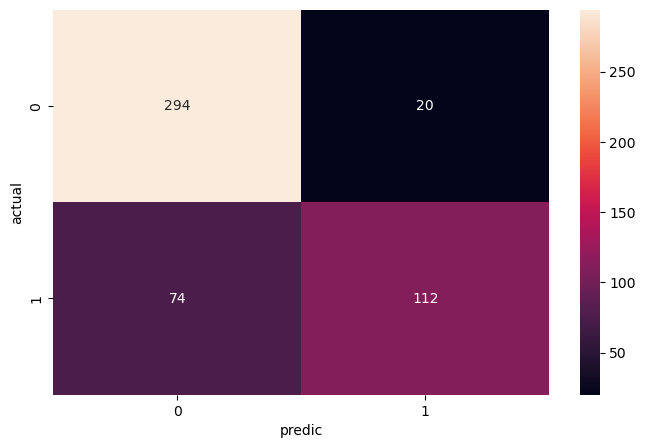

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predic), annot=True, fmt=".0f", ax=ax)
plt.xlabel("predic")
plt.ylabel("actual")
plt.show()